In [2]:
import os
os.chdir('/home/ssobti/projects/mir_tud/packages/ciberatac-main/src/mave')
import pandas as pd
import numpy as np
import scanpy as sc
import itertools
import pickle
import shelve

In [3]:
adata = sc.read('/home/ssobti/projects/mir_tud/010523_filtered_data/miR.concat.raw.adata_gex.guide_assigned.h5ad')

Only considering the two last: ['.guide_assigned', '.h5ad'].
Only considering the two last: ['.guide_assigned', '.h5ad'].


In [4]:
sc.settings.verbosity = 3        # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

2023-02-12 19:28:30.297694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 pynndescent==0.5.8


In [5]:
adata = sc.read('/home/ssobti/projects/mir_tud/010523_filtered_data/miR.concat.raw.adata_gex.guide_assigned.h5ad')

Only considering the two last: ['.guide_assigned', '.h5ad'].
Only considering the two last: ['.guide_assigned', '.h5ad'].


In [6]:
adata2 = sc.read('/home/ssobti/projects/mir_tud/010523_filtered_data/miR.integrated.qc_norm_scaled.dimred.clustered.gex.guide_assigned.h5ad')

Only considering the two last: ['.guide_assigned', '.h5ad'].
Only considering the two last: ['.guide_assigned', '.h5ad'].


/home/ssobti/miniconda3/envs/mave/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [7]:
adata2.obs

orig.ident  nCount_RNA  nFeature_RNA sample  \
miR_1:AAACCCAAGGAGAGGC-1        miR     33954.0          5998  miR_1   
miR_1:AAACCCAAGGTAAACT-1        miR     31928.0          6868  miR_1   
miR_1:AAACCCACAACGATCT-1        miR     42785.0          7447  miR_1   
miR_1:AAACCCACACGATTCA-1        miR     58537.0          8039  miR_1   
miR_1:AAACCCACAGTCAACT-1        miR     31579.0          6580  miR_1   
...                             ...         ...           ...    ...   
miR_3:TTTGGTTTCGGACTTA-1        miR     25937.0          5525  miR_3   
miR_3:TTTGTTGCACGCGTGT-1        miR     82115.0          8826  miR_3   
miR_3:TTTGTTGCATAGATCC-1        miR     34833.0          6430  miR_3   
miR_3:TTTGTTGGTCTAGTGT-1        miR     22318.0          5103  miR_3   
miR_3:TTTGTTGGTTTCCATT-1        miR     19834.0          5082  miR_3   

                                   barcode             guide       lor  \
miR_1:AAACCCAAGGAGAGGC-1  AAACCCAAGGAGAGGC   hsa-miR-203a-3p  5.453121   
miR_1:AAACCCAAGGTAAACT-1  AAACCCAAGGTAAACT     hsa-miR-93-3p  6.012001   
miR_1:AAACCCACAACGATCT-1  AAACCCACAACGATCT   hsa-miR-130b-3p  5.864701   
miR_1:AAACCCACACGATTCA-1  AAACCCACACGATTCA         TuD_NC_18  5.859895   
miR_1:AAACCCACAGTCAACT-1  AAACCCACAGTCAACT   hsa-miR-147b-5p  5.632808   
...                                    ...               ...       ...   
miR_3:TTTGGTTTCGGACTTA-1  TTTGGTTTCGGACTTA    hsa-miR-616-5p  3.885564   
miR_3:TTTGTTGCACGCGTGT-1  TTTGTTGCACGCGTGT    hsa-miR-361-5p  0.506602   
miR_3:TTTGTTGCATAGATCC-1  TTTGTTGCATAGATCC   hsa-miR-548o-3p  6.603449   
miR_3:TTTGTTGGTCTAGTGT-1  TTTGTTGGTCTAGTGT   hsa-miR-3940-5p  2.402414   
miR_3:TTTGTTGGTTTCCATT-1  TTTGTTGGTTTCCATT  hsa-miR-10527-5p  6.014592   

                                 pvalue     adj_pvalue  max_umi  ...  \
miR_1:AAACCCAAGGAGAGGC-1  2.983000e-159  3.010603e-152     67.0  ...   
miR_1:AAACCCAAGGTAAACT-1  3.907611e-225  3.943769e-218     97.0  ...   
miR_1:AAACCCACAACGATCT-1  3.299362e-202  3.329893e-195     89.0  ...   
miR_1:AAACCCACACGATTCA-1  2.574602e-201  2.598426e-194     96.0  ...   
miR_1:AAACCCACAGTCAACT-1  3.564463e-178  3.597446e-171     71.0  ...   
...                                 ...            ...      ...  ...   
miR_3:TTTGGTTTCGGACTTA-1  8.005527e-277  6.410418e-270    129.0  ...   
miR_3:TTTGTTGCACGCGTGT-1   8.834341e-07   1.000000e+00      2.0  ...   
miR_3:TTTGTTGCATAGATCC-1  5.795787e-306  4.640971e-299    126.0  ...   
miR_3:TTTGTTGGTCTAGTGT-1  5.349572e-125  4.283664e-118     58.0  ...   
miR_3:TTTGTTGGTTTCCATT-1  4.169835e-209  3.338991e-202    101.0  ...   

                             m_umi      v_umi  log_max_umi  log_n_umi  \
miR_1:AAACCCAAGGAGAGGC-1  0.196474  11.324937     1.826075   1.892095   
miR_1:AAACCCAAGGTAAACT-1  0.272040  23.713686     1.986772   2.033424   
miR_1:AAACCCACAACGATCT-1  0.284635  19.981910     1.949390   2.053078   
miR_1:AAACCCACACGATTCA-1  0.287154  23.235516     1.982271   2.056905   
miR_1:AAACCCACAGTCAACT-1  0.216625  12.725683     1.851258   1.934498   
...                            ...        ...          ...        ...   
miR_3:TTTGGTTTCGGACTTA-1  0.596977  44.983627     2.110590   2.374748   
miR_3:TTTGTTGCACGCGTGT-1  0.030227   0.034438     0.301030   1.079181   
miR_3:TTTGTTGCATAGATCC-1  0.400504  40.028586     2.100371   2.201397   
miR_3:TTTGTTGGTCTAGTGT-1  0.277078   9.251317     1.763428   2.041393   
miR_3:TTTGTTGGTTTCCATT-1  0.329975  25.736801     2.004321   2.117271   

                          log_m_umi  percent.mt  integrated_snn_res.0.5  \
miR_1:AAACCCAAGGAGAGGC-1  -0.706696    8.576309                       2   
miR_1:AAACCCAAGGTAAACT-1  -0.565367    6.549110                       0   
miR_1:AAACCCACAACGATCT-1  -0.545712    8.844221                       0   
miR_1:AAACCCACACGATTCA-1  -0.541886   10.072262                       1   
miR_1:AAACCCACAGTCAACT-1  -0.664292    7.698154                       8   
...                             ...         ...                     ...   
miR_

In [8]:
## make sure to only keep that were present in Larisa's normalized data
cells_to_keep = [cell for cell in adata2.obs.index.to_list() if cell in adata.obs.index.to_list()]
adata = adata[cells_to_keep,:]

In [9]:
list(adata.obs.index) == list(adata2.obs.index)

True

In [10]:
adata.obs.loc[:,'guide'] = adata2.obs.loc[:,'miR.family']

/tmp/ipykernel_264167/2483903368.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  adata.obs.loc[:,'guide'] = adata2.obs.loc[:,'miR.family']


In [11]:
adata.obs

sample           barcode                      guide  \
miR_1:AAACCCAAGGAGAGGC-1  miR_1  AAACCCAAGGAGAGGC              miR-203a-3p.1   
miR_1:AAACCCAAGGTAAACT-1  miR_1  AAACCCAAGGTAAACT                  miR-93-3p   
miR_1:AAACCCACAACGATCT-1  miR_1  AAACCCACAACGATCT   miR-130-3p/301-3p/454-3p   
miR_1:AAACCCACACGATTCA-1  miR_1  AAACCCACACGATTCA                         NA   
miR_1:AAACCCACAGTCAACT-1  miR_1  AAACCCACAGTCAACT                   miR-147b   
...                         ...               ...                        ...   
miR_3:TTTGGTTTCGGACTTA-1  miR_3  TTTGGTTTCGGACTTA  miR-371b-5p/373-5p/616-5p   
miR_3:TTTGTTGCACGCGTGT-1  miR_3  TTTGTTGCACGCGTGT                 miR-361-5p   
miR_3:TTTGTTGCATAGATCC-1  miR_3  TTTGTTGCATAGATCC                   miR-1323   
miR_3:TTTGTTGGTCTAGTGT-1  miR_3  TTTGTTGGTCTAGTGT           miR-3940-5p/4507   
miR_3:TTTGTTGGTTTCCATT-1  miR_3  TTTGTTGGTTTCCATT           hsa-miR-10527-5p   

                               lor         pvalue     adj_pvalue  max_umi  \
miR_1:AAACCCAAGGAGAGGC-1  5.453121  2.983000e-159  3.010603e-152     67.0   
miR_1:AAACCCAAGGTAAACT-1  6.012001  3.907611e-225  3.943769e-218     97.0   
miR_1:AAACCCACAACGATCT-1  5.864701  3.299362e-202  3.329893e-195     89.0   
miR_1:AAACCCACACGATTCA-1  5.859895  2.574602e-201  2.598426e-194     96.0   
miR_1:AAACCCACAGTCAACT-1  5.632808  3.564463e-178  3.597446e-171     71.0   
...                            ...            ...            ...      ...   
miR_3:TTTGGTTTCGGACTTA-1  3.885564  8.005527e-277  6.410418e-270    129.0   
miR_3:TTTGTTGCACGCGTGT-1  0.506602   8.834341e-07   1.000000e+00      2.0   
miR_3:TTTGTTGCATAGATCC-1  6.603449  5.795787e-306  4.640971e-299    126.0   
miR_3:TTTGTTGGTCTAGTGT-1  2.402414  5.349572e-125  4.283664e-118     58.0   
miR_3:TTTGTTGGTTTCCATT-1  6.014592  4.169835e-209  3.338991e-202    101.0   

                          n_umi     m_umi      v_umi  log_max_umi  log_n_umi  \
miR_1:AAACCCAAGGAGAGGC-1   78.0  0.196474  11.324937     1.826075   1.892095   
miR_1:AAACCCAAGGTAAACT-1  108.0  0.272040  23.713686     1.986772   2.033424   
miR_1:AAACCCACAACGATCT-1  113.0  0.284635  19.981910     1.949390   2.053078   
miR_1:AAACCCACACGATTCA-1  114.0  0.287154  23.235516     1.982271   2.056905   
miR_1:AAACCCACAGTCAACT-1   86.0  0.216625  12.725683     1.851258   1.934498   
...                         ...       ...        ...          ...        ...   
miR_3:TTTGGTTTCGGACTTA-1  237.0  0.596977  44.983627     2.110590   2.374748   
miR_3:TTTGTTGCACGCGTGT-1   12.0  0.030227   0.034438     0.301030   1.079181   
miR_3:TTTGTTGCATAGATCC-1  159.0  0.400504  40.028586     2.100371   2.201397   
miR_3:TTTGTTGGTCTAGTGT-1  110.0  0.277078   9.251317     1.763428   2.041393   
miR_3:TTTGTTGGTTTCCATT-1  131.0  0.329975  25.736801     2.004321   2.117271   

                          log_m_umi  
miR_1:AAACCCAAGGAGAGGC-1  -0.706696  
miR_1:AAACCCAAGGTAAACT-1  -0.565367  
miR_1:AAACCCACAACGATCT-1  -0.545712  
miR_1:AAACCCACACGATTCA-1  -0.541886  
miR_1:AAACCCACAGTCAACT-1  -0.664292  
...                             ...  
miR_3:TTTGGTTTCGGACTTA-1  -0.224042  
miR_3:TTTGTTGCACGCGTGT-1  -1.519609  
miR_3:TTTGTTGCATAGATCC-1  -0.397393  
miR_3:TTTGTTGGTCTAGTGT-1  -0.557398  
miR_3:TTTGTTGGTTTCCATT-1  -0.481519  

[29348 rows x 13 columns]

In [12]:
del adata2

In [13]:
### feed in raw matrix (adata.X) into VAE with filter out cells with low # genes and genes expressed in low # of cells
adata.var_names_make_unique()

In [14]:
adata.shape

(29348, 36601)

normalizing counts per cell
    finished (0:00:01)


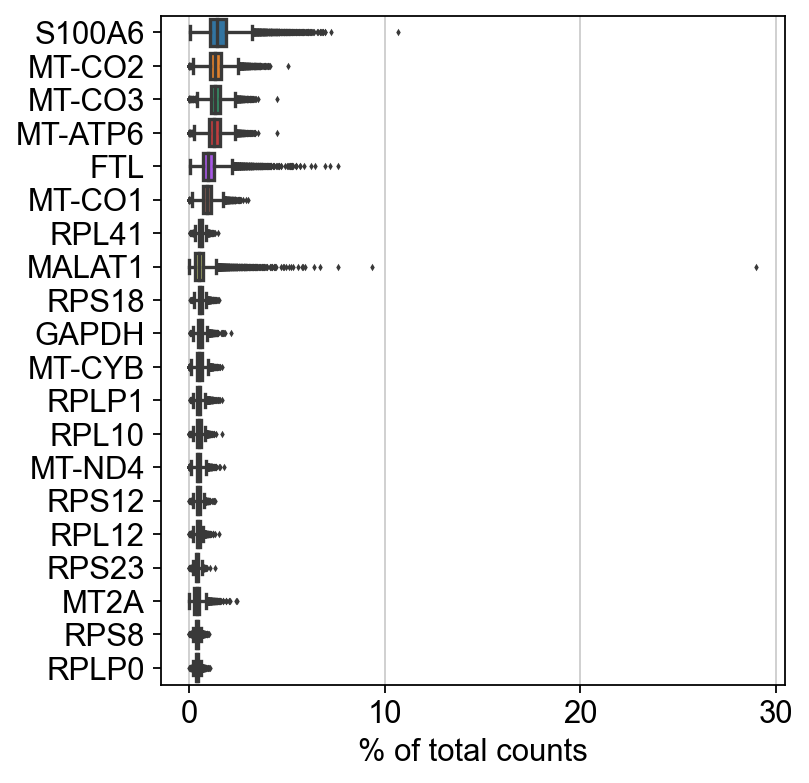

In [15]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [16]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 6388 genes that are detected in less than 3 cells


In [17]:
adata.shape

(29348, 30213)

In [18]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

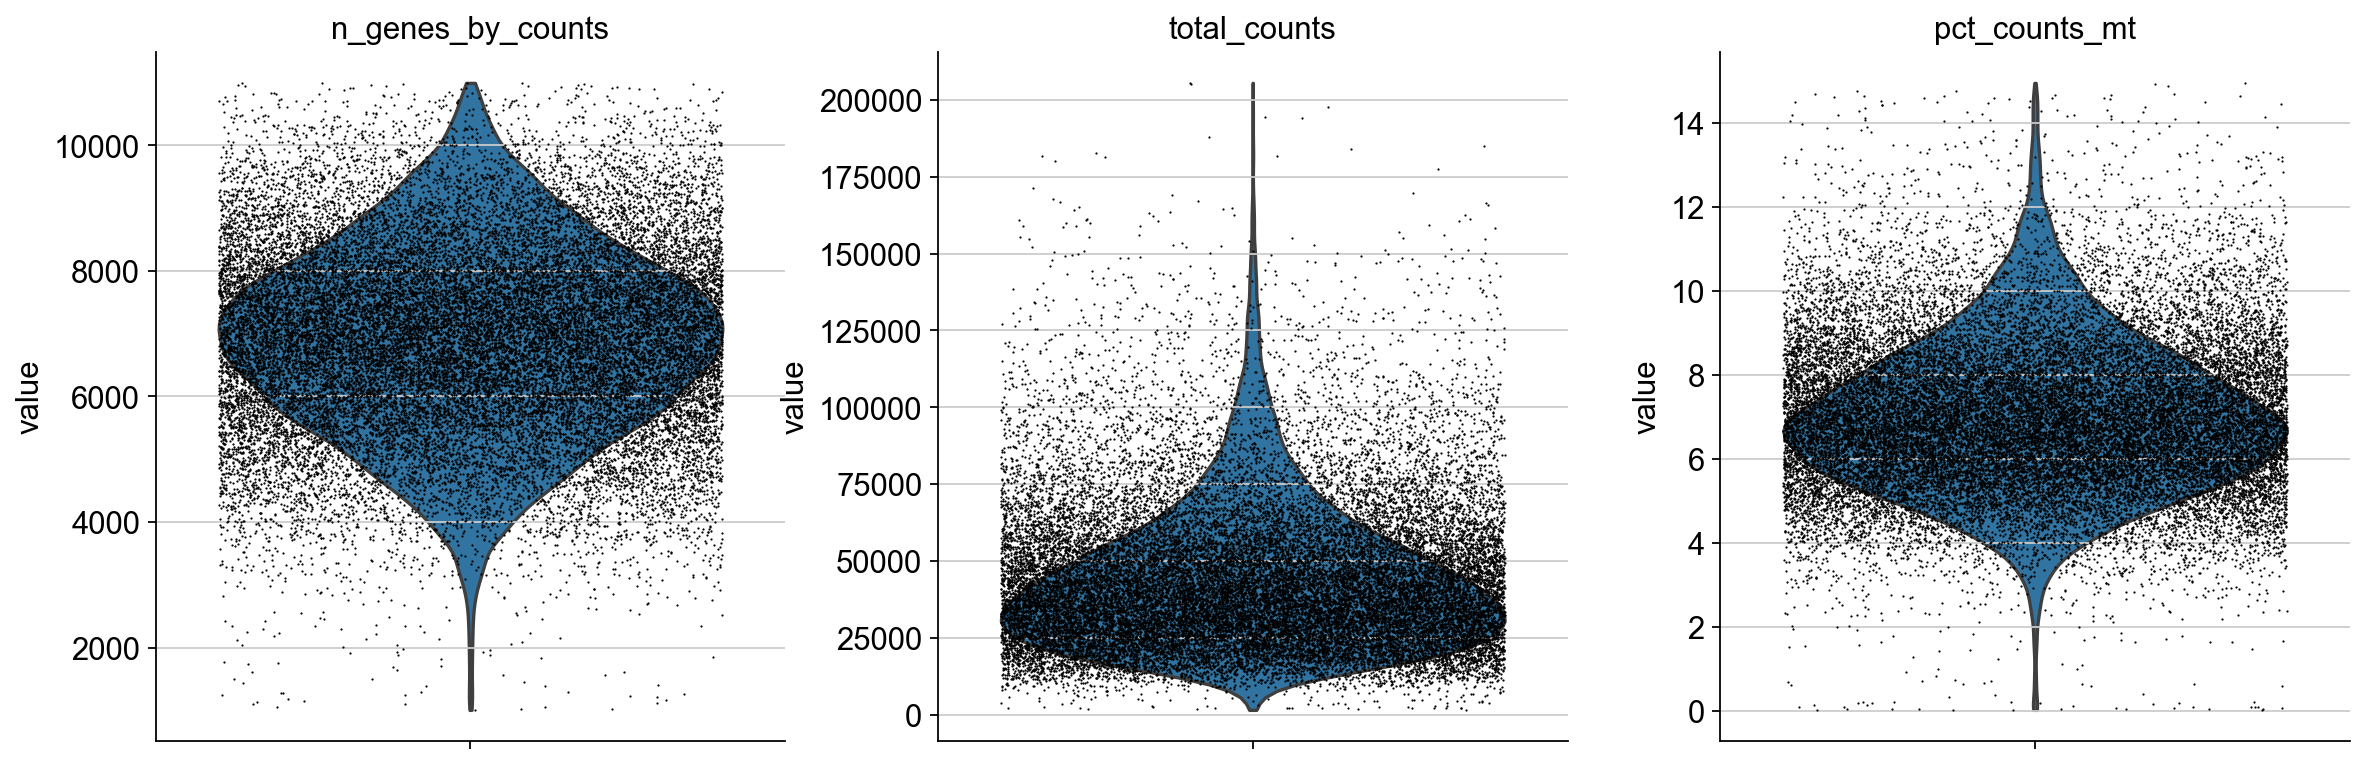

In [19]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

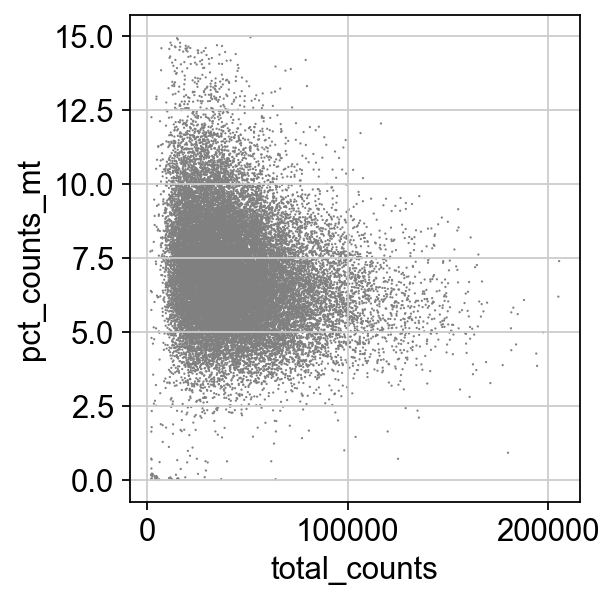

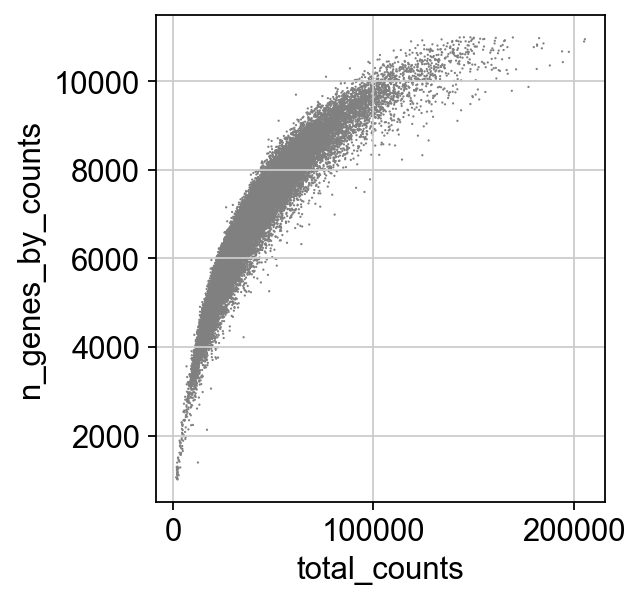

In [20]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [21]:
adata = adata[adata.obs.pct_counts_mt < 15, :]

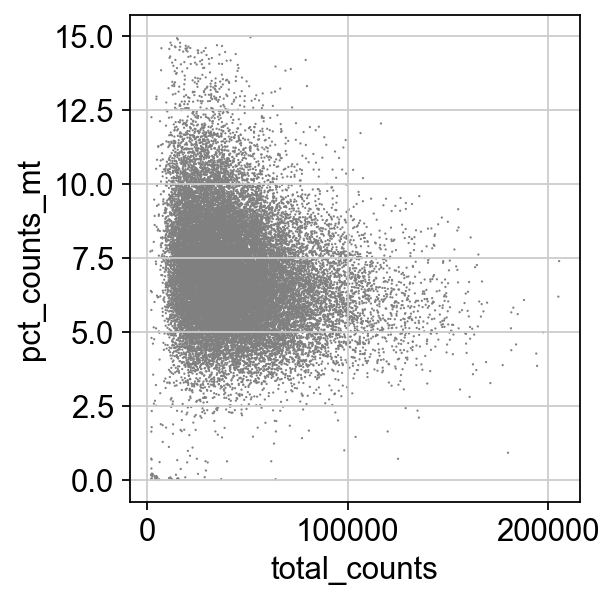

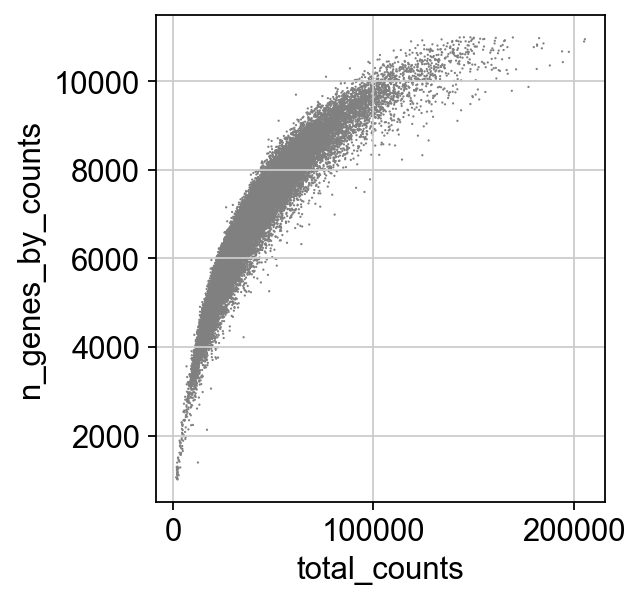

In [22]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [23]:
adata.shape

(29348, 30213)

In [24]:
### remove ('hsa-miR-92a-3p', ['miR_1:TCACAAGTCGGCATAT-1']) from adata
cells_to_keep = [cell for cell in adata.obs.index.to_list() if cell != 'miR_1:TCACAAGTCGGCATAT-1']
adata = adata[cells_to_keep,:]

In [25]:
adata.shape

(29347, 30213)

In [26]:
### making all 20 control guides the same annotation
meta = adata.obs
meta = meta.astype({'guide':'string'})
meta.loc[meta.loc[:,'guide'] == 'NA', 'guide'] = 'TuD_NC'
meta = meta.astype({'guide':'category'})
adata.obs = meta
meta.dtypes

sample               category
barcode              category
guide                category
lor                   float64
pvalue                float64
adj_pvalue            float64
max_umi               float64
n_umi                 float64
m_umi                 float64
v_umi                 float64
log_max_umi           float64
log_n_umi             float64
log_m_umi             float64
n_genes                 int64
n_genes_by_counts       int32
total_counts          float32
total_counts_mt       float32
pct_counts_mt         float32
dtype: object

In [27]:
adata.obs

sample           barcode                      guide  \
miR_1:AAACCCAAGGAGAGGC-1  miR_1  AAACCCAAGGAGAGGC              miR-203a-3p.1   
miR_1:AAACCCAAGGTAAACT-1  miR_1  AAACCCAAGGTAAACT                  miR-93-3p   
miR_1:AAACCCACAACGATCT-1  miR_1  AAACCCACAACGATCT   miR-130-3p/301-3p/454-3p   
miR_1:AAACCCACACGATTCA-1  miR_1  AAACCCACACGATTCA                     TuD_NC   
miR_1:AAACCCACAGTCAACT-1  miR_1  AAACCCACAGTCAACT                   miR-147b   
...                         ...               ...                        ...   
miR_3:TTTGGTTTCGGACTTA-1  miR_3  TTTGGTTTCGGACTTA  miR-371b-5p/373-5p/616-5p   
miR_3:TTTGTTGCACGCGTGT-1  miR_3  TTTGTTGCACGCGTGT                 miR-361-5p   
miR_3:TTTGTTGCATAGATCC-1  miR_3  TTTGTTGCATAGATCC                   miR-1323   
miR_3:TTTGTTGGTCTAGTGT-1  miR_3  TTTGTTGGTCTAGTGT           miR-3940-5p/4507   
miR_3:TTTGTTGGTTTCCATT-1  miR_3  TTTGTTGGTTTCCATT           hsa-miR-10527-5p   

                               lor         pvalue     adj_pvalue  max_umi  \
miR_1:AAACCCAAGGAGAGGC-1  5.453121  2.983000e-159  3.010603e-152     67.0   
miR_1:AAACCCAAGGTAAACT-1  6.012001  3.907611e-225  3.943769e-218     97.0   
miR_1:AAACCCACAACGATCT-1  5.864701  3.299362e-202  3.329893e-195     89.0   
miR_1:AAACCCACACGATTCA-1  5.859895  2.574602e-201  2.598426e-194     96.0   
miR_1:AAACCCACAGTCAACT-1  5.632808  3.564463e-178  3.597446e-171     71.0   
...                            ...            ...            ...      ...   
miR_3:TTTGGTTTCGGACTTA-1  3.885564  8.005527e-277  6.410418e-270    129.0   
miR_3:TTTGTTGCACGCGTGT-1  0.506602   8.834341e-07   1.000000e+00      2.0   
miR_3:TTTGTTGCATAGATCC-1  6.603449  5.795787e-306  4.640971e-299    126.0   
miR_3:TTTGTTGGTCTAGTGT-1  2.402414  5.349572e-125  4.283664e-118     58.0   
miR_3:TTTGTTGGTTTCCATT-1  6.014592  4.169835e-209  3.338991e-202    101.0   

                          n_umi     m_umi      v_umi  log_max_umi  log_n_umi  \
miR_1:AAACCCAAGGAGAGGC-1   78.0  0.196474  11.324937     1.826075   1.892095   
miR_1:AAACCCAAGGTAAACT-1  108.0  0.272040  23.713686     1.986772   2.033424   
miR_1:AAACCCACAACGATCT-1  113.0  0.284635  19.981910     1.949390   2.053078   
miR_1:AAACCCACACGATTCA-1  114.0  0.287154  23.235516     1.982271   2.056905   
miR_1:AAACCCACAGTCAACT-1   86.0  0.216625  12.725683     1.851258   1.934498   
...                         ...       ...        ...          ...        ...   
miR_3:TTTGGTTTCGGACTTA-1  237.0  0.596977  44.983627     2.110590   2.374748   
miR_3:TTTGTTGCACGCGTGT-1   12.0  0.030227   0.034438     0.301030   1.079181   
miR_3:TTTGTTGCATAGATCC-1  159.0  0.400504  40.028586     2.100371   2.201397   
miR_3:TTTGTTGGTCTAGTGT-1  110.0  0.277078   9.251317     1.763428   2.041393   
miR_3:TTTGTTGGTTTCCATT-1  131.0  0.329975  25.736801     2.004321   2.117271   

                          log_m_umi  n_genes  n_genes_by_counts  total_counts  \
miR_1:AAACCCAAGGAGAGGC-1  -0.706696     6001               6001       33957.0   
miR_1:AAACCCAAGGTAAACT-1  -0.565367     6871               6870       31930.0   
miR_1:AAACCCACAACGATCT-1  -0.545712     7448               7448       42786.0   
miR_1:AAACCCACACGATTCA-1  -0.541886     8043               8042       58540.0   
miR_1:AAACCCACAGTCAACT-1  -0.664292     6582               6582       31581.0   
...                             ...      ...                ...           ...   
miR_3:TTTGGTTTCGGACTTA-1  -0.224042     5525               5525       25937.0   
miR_3:TTTGTTGCACGCGTGT-1  -1.519609     8828               8828       82117.0   
miR_3:TTTGTTGCATAGATCC-1  -0.397393     6431               6431       34834.0   
miR_3:TTTGTTGGTCTAGTGT-1  -0.557398     5103               5103       22318.0   
miR_3:TTTGTTGGTTTCCATT-1  -0.481519     5082               5082       19834.0   

                          total_counts_mt  pct_counts_mt  
miR_1:AAACCCAAGGAGAGGC-1           2912.0       8.575551  
miR_1:AAACCCAAGGTAAACT-1           2091.0       6.548700  
miR_1:AAACCCACAACGATCT-1    

In [28]:
### pertubation annotation to add to each cell
one_hot_df = pd.get_dummies(adata.obs["guide"])

In [29]:
one_hot_df

TuD_NC  hsa-miR-10399-3p  hsa-miR-10399-5p  \
miR_1:AAACCCAAGGAGAGGC-1       0                 0                 0   
miR_1:AAACCCAAGGTAAACT-1       0                 0                 0   
miR_1:AAACCCACAACGATCT-1       0                 0                 0   
miR_1:AAACCCACACGATTCA-1       1                 0                 0   
miR_1:AAACCCACAGTCAACT-1       0                 0                 0   
...                          ...               ...               ...   
miR_3:TTTGGTTTCGGACTTA-1       0                 0                 0   
miR_3:TTTGTTGCACGCGTGT-1       0                 0                 0   
miR_3:TTTGTTGCATAGATCC-1       0                 0                 0   
miR_3:TTTGTTGGTCTAGTGT-1       0                 0                 0   
miR_3:TTTGTTGGTTTCCATT-1       0                 0                 0   

                          hsa-miR-10401-3p  hsa-miR-10523-5p  \
miR_1:AAACCCAAGGAGAGGC-1                 0                 0   
miR_1:AAACCCAAGGTAAACT-1                 0                 0   
miR_1:AAACCCACAACGATCT-1                 0                 0   
miR_1:AAACCCACACGATTCA-1                 0                 0   
miR_1:AAACCCACAGTCAACT-1                 0                 0   
...                                    ...               ...   
miR_3:TTTGGTTTCGGACTTA-1                 0                 0   
miR_3:TTTGTTGCACGCGTGT-1                 0                 0   
miR_3:TTTGTTGCATAGATCC-1                 0                 0   
miR_3:TTTGTTGGTCTAGTGT-1                 0                 0   
miR_3:TTTGTTGGTTTCCATT-1                 0                 0   

                          hsa-miR-10526-3p  hsa-miR-10527-5p  hsa-miR-9903  \
miR_1:AAACCCAAGGAGAGGC-1                 0                 0             0   
miR_1:AAACCCAAGGTAAACT-1                 0                 0             0   
miR_1:AAACCCACAACGATCT-1                 0                 0             0   
miR_1:AAACCCACACGATTCA-1                 0                 0             0   
miR_1:AAACCCACAGTCAACT-1                 0                 0             0   
...                                    ...               ...           ...   
miR_3:TTTGGTTTCGGACTTA-1                 0                 0             0   
miR_3:TTTGTTGCACGCGTGT-1                 0                 0             0   
miR_3:TTTGTTGCATAGATCC-1                 0                 0             0   
miR_3:TTTGTTGGTCTAGTGT-1                 0                 0             0   
miR_3:TTTGTTGGTTTCCATT-1                 0                 1             0   

                          let-7-5p/98-5p  let-7a-2-3p/let-7g-3p  ...  \
miR_1:AAACCCAAGGAGAGGC-1               0                      0  ...   
miR_1:AAACCCAAGGTAAACT-1               0                      0  ...   
miR_1:AAACCCACAACGATCT-1               0                      0  ...   
miR_1:AAACCCACACGATTCA-1               0                      0  ...   
miR_1:AAACCCACAGTCAACT-1               0                      0  ...   
...                                  ...                    ...  ...   
miR_3:TTTGGTTTCGGACTTA-1               0                      0  ...   
miR_3:TTTGTTGCACGCGTGT-1               0                      0  ...   
miR_3:TTTGTTGCATAGATCC-1               0                      0  ...   
miR_3:TTTGTTGGTCTAGTGT-1               0                      0  ...   
miR_3:TTTGTTGGTTTCCATT-1               0                      0  ...   

                          miR-93-3p  miR-937-3p  miR-940/6808-5p/6893-5p  \
miR_1:AAACCCAAGGAGAGGC-1          0           0                        0   
miR_1:AAACCCAAGGTAAACT-1          1           0                        0   
miR_1:AAACCCACAACGATCT-1          0           0                        0   
miR_1:AAACCCACACGATTCA-1          0           0                        0   
miR_1:AAACCCACAGTCAACT-1          0           0                        0   
...                             ...         ...                      ...   
miR_3:TTTGGTTTCGGACTTA-1          0           0           

In [30]:
## add the gene annotation for the first layer
## the first layer is connected to the second in a way such that reflects pathways
## RBP_gene_df is the gene connections (first layer) to TFs (second layer) gmt file

In [31]:
import scipy.sparse as sp_sparse
import tables
from itertools import chain
from model import loss_function
from model import VAE
import numpy as np
import os
import pandas as pd
import torch
from gseapy import read_gmt
from datetime import datetime


In [32]:
miR_targets_annot = pd.read_csv('/home/ssobti/projects/mir_tud/uploaded_data/Predicted_Targets_Info.default_predictions.txt', sep='\t')

In [33]:
miR_targets_annot = miR_targets_annot.loc[:, ['miR Family', 'Gene Symbol']]
miR_targets_annot

miR Family Gene Symbol
0                                        miR-23-3p        A1BG
1                                           miR-23        A1BG
2                                        miR-23-3p        A1BG
3                                           miR-23        A1BG
4       miR-302-3p/372-3p/373/518-3p/519-3p/520-3p        A1CF
...                                            ...         ...
718228                                miR-1-3p/206        ZZZ3
718229                                miR-1-3p/206        ZZZ3
718230                                  miR-494-3p        ZZZ3
718231                                  miR-494-3p        ZZZ3
718232                                     miR-338        ZZZ3

[718233 rows x 2 columns]

In [34]:
miR_families = list(set(miR_targets_annot.loc[:,'miR Family']))

In [35]:
gmt_file = {}
for idx, miR_fam in enumerate(miR_families):
    targets = miR_targets_annot.loc[miR_fam == miR_targets_annot.loc[:, 'miR Family'], 'Gene Symbol']
    gmt_file[miR_fam] = list(targets)

In [36]:
### creating a matrix that links gene sets (columns) to master regulators (rows) via 0/1 annotation
gmt_file = pd.Series(gmt_file).str.join('|')
gmt_file = gmt_file.str.get_dummies()
gmt_file

A1BG  A1CF  A2M  A4GNT  AACS  AADACL3  \
miR-187-3p                              0     0    0      0     0        0   
miR-346-5p                              0     0    0      0     0        0   
miR-494-3p                              0     0    0      0     0        0   
miR-200b-3p/429-3p                      0     0    0      0     0        0   
miR-212                                 0     0    0      0     0        0   
...                                   ...   ...  ...    ...   ...      ...   
miR-21-5p/590-5p                        0     0    0      0     0        0   
miR-215-5p                              0     0    0      0     0        0   
miR-25-3p/32-5p/92-3p/363-3p/367-3p     0     0    0      0     0        0   
miR-33-5p                               0     0    0      0     0        0   
miR-433-3p                              0     0    0      0     0        0   

                                     AADAT  AAED1  AAGAB  AAK1  ...  ZWILCH  \
miR-187-3p                               0      0      0     0  ...       0   
miR-346-5p                               0      0      0     0  ...       0   
miR-494-3p                               0      0      0     0  ...       0   
miR-200b-3p/429-3p                       0      0      0     0  ...       0   
miR-212                                  0      0      0     1  ...       0   
...                                    ...    ...    ...   ...  ...     ...   
miR-21-5p/590-5p                         0      0      0     1  ...       0   
miR-215-5p                               0      0      0     0  ...       0   
miR-25-3p/32-5p/92-3p/363-3p/367-3p      0      0      0     0  ...       0   
miR-33-5p                                0      0      0     0  ...       0   
miR-433-3p                               0      0      0     0  ...       0   

                                     ZXDA  ZXDB  ZXDC  ZYG11A  ZYG11B  ZYX  \
miR-187-3p                              0     0     0       0       0    0   
miR-346-5p                              0     0     0       0       0    0   
miR-494-3p                              0     0     0       0       0    0   
miR-200b-3p/429-3p                      0     0     0       0       0    0   
miR-212                                 0     0     0       0       0    0   
...                                   ...   ...   ...     ...     ...  ...   
miR-21-5p/590-5p                        0     0     0       0       0    0   
miR-215-5p                              0     0     0       0       0    0   
miR-25-3p/32-5p/92-3p/363-3p/367-3p     0     0     0       0       0    0   
miR-33-5p                               0     0     0       0       0    0   
miR-433-3p                              0     0     0       0       0    0   

                                     ZZEF1  ZZZ3  hsa-mir-1199  
miR-187-3p                               0     0             0  
miR-346-5p                               0     0             0  
miR-494-3p                               0     1             0  
miR-200b-3p/429-3p                       0     0             0  
miR-212                                  0     0             0  
...                                    ...   ...           ...  
miR-21-5p/590-5p                         0     0             0  
miR-215-5p                               0     0             0  
miR-25-3p/32-5p/92-3p/363-3p/367-3p      0     0             0  
miR-33-5p                                0     0             0  
miR-433-3p                               0     0             0  

[580 rows x 13759 columns]

In [37]:
## remove genes not in intersection bw expression matrix and gene_set annotation df
a = set(gmt_file.columns.to_list())
b = set(adata.var.index.to_list())

intersecting_genes = list(a.intersection(b))
print('Genes in annotated gene sets', len(a))
print('Genes in expression matrix', len(b))
print('Union', len(a.union(b)))
print('Intersecting genes kept', len(a.intersection(b)))

adata = adata[:, intersecting_genes]
gmt_file = gmt_file.loc[:, intersecting_genes]

Genes in annotated gene sets 13759
Genes in expression matrix 30213
Union 31677
Intersecting genes kept 12295


In [38]:
#### LOADING

import shelve
filenm = '/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000_newest_edits_100cells_shap/shap_output_and_selected_cells.out'
my_shelf = shelve.open(filenm)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()


In [45]:
input_matrix = dict_out['Input']

In [40]:
import random
random.seed(55)
barcodes_picked = random.sample(randomized_cbc_list, 100)

In [27]:
barcodes_picked

['miR_2:TCCGAAAAGCGAGGAG-1',
 'miR_1:GAATCACTCCCGTTCA-1',
 'miR_2:CCCTAACTCAGCCCAG-1',
 'miR_1:AATGAAGAGGACTATA-1',
 'miR_3:GACTGATGTAGCTGCC-1',
 'miR_2:GACTGATCACCTCTAC-1',
 'miR_1:ACTTCCGCAATAGTCC-1',
 'miR_1:CATGCAATCGCAGATT-1',
 'miR_1:TCTCACGAGCTACAAA-1',
 'miR_1:GGATCTAGTGAGACGT-1',
 'miR_2:CACAGATTCCTTGACC-1',
 'miR_1:AGGATCTTCGTCCATC-1',
 'miR_2:GAAACCTGTCCGGTCA-1',
 'miR_1:ACTGCAACACGTAACT-1',
 'miR_1:CCGAACGGTTTCTTAC-1',
 'miR_2:TGCTCCAAGGTGATAT-1',
 'miR_3:CATTGAGAGACGCCAA-1',
 'miR_2:ACTTATCTCTTTCTAG-1',
 'miR_3:GTCAAGTTCCCGAGAC-1',
 'miR_1:ATCAGGTAGTATGAAC-1',
 'miR_1:ATAGACCTCGAGATAA-1',
 'miR_1:GTAGGTTAGAGACAAG-1',
 'miR_3:ACATTTCTCTAGTTCT-1',
 'miR_3:TACGTCCGTAAGTTAG-1',
 'miR_1:CCTCTAGGTTGCATGT-1',
 'miR_1:AAGCATCCATAGATCC-1',
 'miR_1:TCTTGCGCATCTGCGG-1',
 'miR_2:GCATGATGTACCTAGT-1',
 'miR_3:GTAGAAATCCTACACC-1',
 'miR_1:CCCGAAGCAATACAGA-1',
 'miR_2:CACAGGCTCGCGGTAC-1',
 'miR_3:TAACTTCCAGAGGTAC-1',
 'miR_1:GCTGAATCAGTAACCT-1',
 'miR_1:ACCTGTCCAGGCGTTC-1',
 'miR_1:TGCTCC

In [87]:
feature_names = dict_out["feature_names"]

In [96]:
compar_mtx = adata[:,feature_names].X.toarray()

In [97]:
idx_collector = []
for idx, row in enumerate(compar_mtx):
    for idx2, row_sub in enumerate(input_matrix):
        if np.array_equal(row_sub, row):
            idx_collector.append(idx)

In [102]:
import shap
device = 'cpu'
expar_all = adata[idx_collector, feature_names].X.toarray()
tensor_expar_all = torch.from_numpy(expar_all).to(device).float()

In [128]:
from matplotlib import pyplot as plt

In [159]:
category_names = [x[0:25] for x in list(one_hot_df.columns)]

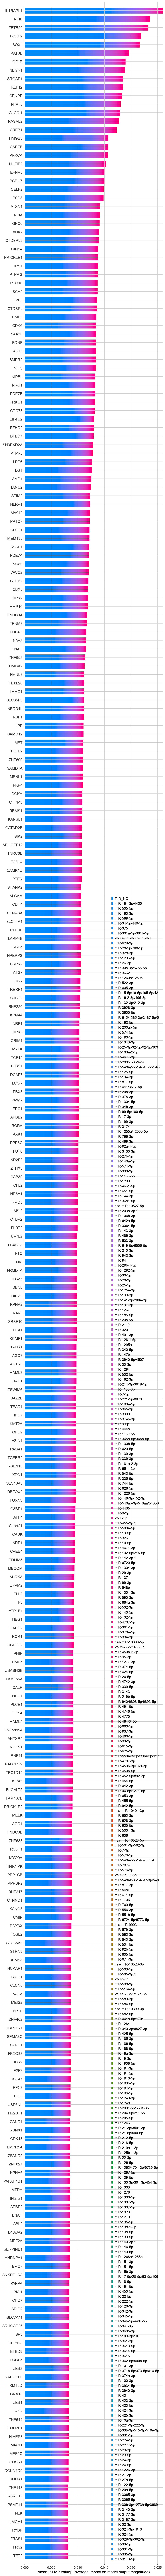

In [161]:
shap.summary_plot(dict_out['Shap.values'], tensor_expar_all.detach().cpu().numpy(), 
                  feature_names, max_display=300, class_names=category_names, show=False)
fig = plt.gcf()
fig.savefig('/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000_newest_edits_100cells_shap/summary_fig_100top.pdf', dpi = fig.dpi)

In [176]:
len(dict_out['Shap.values'][0][0])

12295

In [200]:
len(np.where([x == 'TuD_NC' for x in test_predictions])[0].tolist())

5771

In [201]:
len(test_predictions)

5869

In [203]:
len(np.where([x == 'TuD_NC' for x in actual_test_guides])[0].tolist())

649

In [204]:
649/5869

0.11058101891293236

In [202]:
5771/5869

0.9833020957573693

In [179]:
actual_test_guides

['miR-3605-5p',
 'miR-365-3p',
 'TuD_NC',
 'miR-200ab-5p',
 'miR-99-3p',
 'miR-210-3p',
 'miR-4707-5p',
 'miR-503-5p',
 'miR-34-5p/449-5p',
 'miR-28-5p/708-5p',
 'miR-548ay-5p/548au-5p/548as-5p/548ar-5p/548aq-5p/548ap-5p/548am-5p/548ae-5p/548ad-5p/548a-5p/548ak/548ab/548bb-5p/548b-5p/548c-5p/548d-5p/548h-5p/548i/548j-5p/548o-5p/548w/548y/559',
 'miR-106b-3p',
 'TuD_NC',
 'miR-331-5p',
 'miR-660-5p',
 'miR-877-3p',
 'TuD_NC',
 'miR-15-5p/16-5p/195-5p/424-5p/497-5p',
 'TuD_NC',
 'miR-183-3p',
 'TuD_NC',
 'miR-18-5p',
 'miR-642a-5p',
 'miR-101-3p.1',
 'miR-3140-3p',
 'miR-615-3p',
 'miR-34b-3p',
 'miR-21-5p/590-5p',
 'miR-374-5p',
 'miR-1343-3p',
 'miR-218-5p',
 'miR-28-5p/708-5p',
 'miR-574-3p',
 'TuD_NC',
 'miR-29c-5p',
 'miR-128-1-5p',
 'miR-942-5p',
 'miR-1262/4701-3p/6736-5p',
 'miR-192-5p/215-5p',
 'miR-652-3p',
 'miR-25-3p/32-5p/92-3p/363-3p/367-3p',
 'miR-374-5p',
 'miR-183-3p',
 'miR-132-3p/212-3p',
 'miR-532-5p',
 'miR-425-5p',
 'miR-320',
 'miR-200ab-5p',
 'miR-33b-3p/515-3p/51

In [182]:
test_predictions == actual_test_guides

False

In [184]:
sum([a == b for a in test_predictions for b in actual_test_guides])/len(test_predictions)

638.8064406202079

In [185]:
len(test_predictions)

5869

In [186]:
len(actual_test_guides)

5869

In [ ]:
[a == b for a in test_predictions for idx1, b in enumerate(actual_test_guides)]

34445161

In [190]:
len([i for i, j in zip(test_predictions, actual_test_guides) if i == j])/len(test_predictions)

0.10989947180098825